<img src="upGrad.png" alt="upGrad" align="Right" style="width: 200px;"/>
<img src="IIITB.jpeg" alt="IITB" align="Left" style="width: 200px;"/>

## Linear Regression Assignment
<i><b>Author: Anish Mahapatra</b></i>

<i>Machine Learning I > Module 2</i>

### Expected Outcome:

Build a multiple linear regression model to predict car prices.

### Problem Statement:

<b>Geely Auto</b>, a Chinese automobile company aspires to enter the US market and produce cars. They have hired an automobile consulting company (us) to understand the factors on which the pricing of a car depends on. pecifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
    
### Business Goals:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data Preparation to keep in mind
- CarName is a concatenation of Car Company & Car Model
- Only Company name is to be considered as the variable for the purpose of model building

### Model Evaluation:
Post building the model and residual analysis, make sure to do *R-Squared analysis




In [457]:
#Importing the required modules and packages

import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import seed
from numpy import percentile
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import warnings

In [458]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [459]:
# Importing the required csv from the folder:

carData = pd.read_csv('CarPrice_Assignment.csv')

In [460]:
# Sense check of the application data

carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1. Pre-Processing:
- Check the % of missing values
- Check the data types
- Outlier Analysis

### 2. EDA - to understand the data
- Univariate Analysis
- Make heatmap to understand correlation distribution
- Perform Bivariate Analysis



In [461]:
# Checking the top 5 rows and headers of the data
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [462]:
# Looking at the type of the data frame, data types and the number of rows
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [463]:
# Checking the number of rows and columns present in the data
carData.shape

(205, 26)

In [464]:
# Looking at the data types of the data
carData.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [465]:
# Making a copy of the application in dataframe df (checkpoint!) 
df = carData.copy(deep=False)

### Missing Values

In [466]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'columnName': df.columns,
                                 'percentMissing': percentMissing})

In [467]:
# Viewing the dataframe to ensure that the values have been populated correctly
missingValuesDf

,columnName,percentMissing
car_ID,car_ID,0.0
symboling,symboling,0.0
CarName,CarName,0.0
fueltype,fueltype,0.0
aspiration,aspiration,0.0
doornumber,doornumber,0.0
carbody,carbody,0.0
drivewheel,drivewheel,0.0
enginelocation,enginelocation,0.0
wheelbase,wheelbase,0.0


So, we have been fortunate enough to get a clean dataset with no missing values. So there will be no more imputations or missing value treatment to be carried out.

### Outlier Treatment Analysis
Let us now analyze the numerical variables

<b>Note:</b> The Boxplots below have been plotted with the standard whiskers of 1.5 x (IQR)

In [468]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [469]:
# Displaying the top 5 rows of only the numerical values
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, we notice that symboling is a categorical variable.

In [470]:
# Removal of the categorical columns
symboling = df_num.pop('symboling')
car_ID = df_num.pop('car_ID')

We shall analyze the boxplots of the above variables to see if there are any untowardly behavior in the data.

Note: We notice that car_ID is an identifier variable and does not hold significance when it comes

## Outlier Analysis using Box Plots

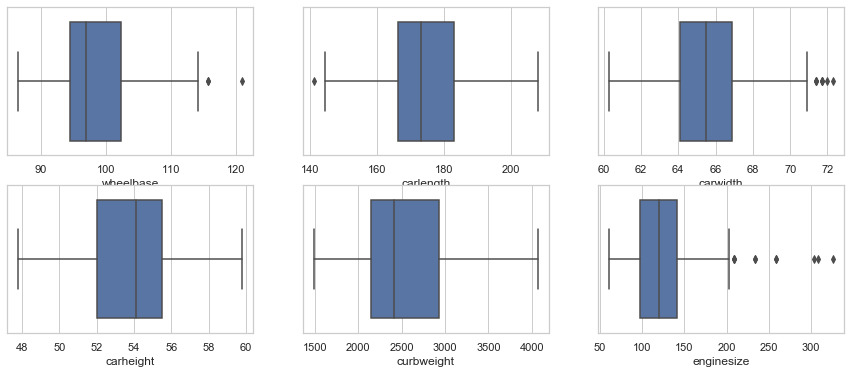

In [471]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'wheelbase', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'carlength', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'carwidth', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'carheight', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'curbweight', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginesize', data = df_num)
plt.show()

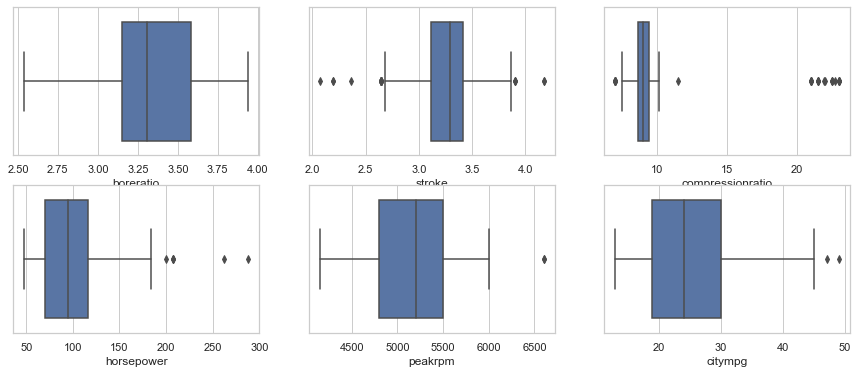

In [472]:
# Making boxplots as sub-plots to understand the trend of the data 

plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'boreratio', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'stroke', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'compressionratio', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'horsepower', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'peakrpm', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'citympg', data = df_num)
plt.show()

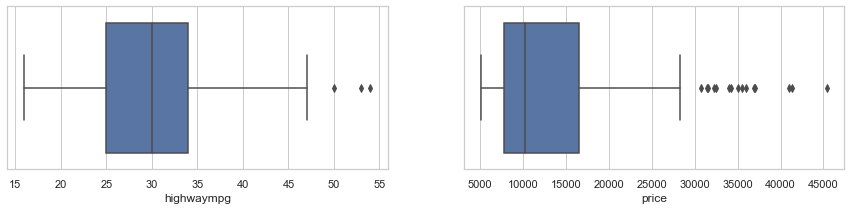

In [473]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 3))
plt.subplot(1,2,1)
sns.boxplot(x = 'highwaympg', data = df_num)
plt.subplot(1,2,2)
sns.boxplot(x = 'price', data = df_num)

Now that we have performed an outlier analysis on the numerical variables of the dataset, we can say that there are a few columns that we can deep drive into with the data:

- <b>citympg</b>: Mileage in the city
- <b>horsepower</b>: horse power
- <b>enginesize</b>: Size of the car
- <b>compressionratio</b>: compression ratio of the car
- <b>stroke</b>: stroke or volume inside the engine
- <b>price</b>: price of the car

### Distribution Analysis

Let us now understand the distribution of the numerical and categorical variables.

### Analysis of numerical variables
Let us now analyze the categorical variables

In [474]:
# Function to plot histogram for numerical, univariate analysis
def plotHistogram(df, colName):
    '''
    This function is used to set the style of the plot, name the graph and plot the distribution for the specified column
    
    Inputs:
    @df (dataframe) - The dataframe for which histograms are to be plotted
    @colName (string) - The numeric column for which histograms is to be plotted
    
    Output:
    Titles distribution plot of specified colName
    '''
    sns.set(style="whitegrid")
    plt.figure(figsize=(20,5)) 
    plt.title(colName)
    plt.ylabel('Density', fontsize=14)
    sns.distplot(df[colName], kde=True)

### Histograms of numerical variables

<Figure size 144x1440 with 0 Axes>

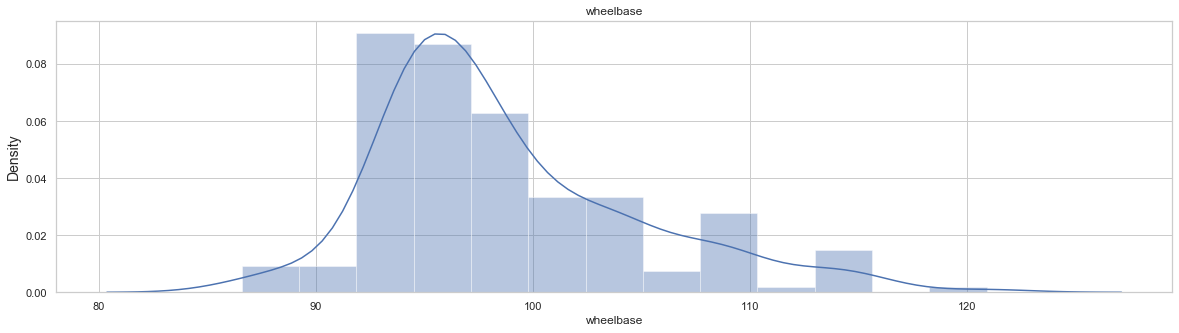

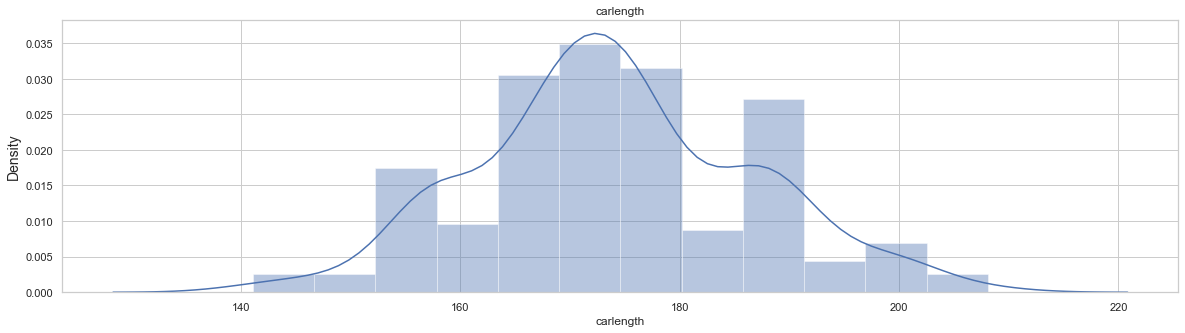

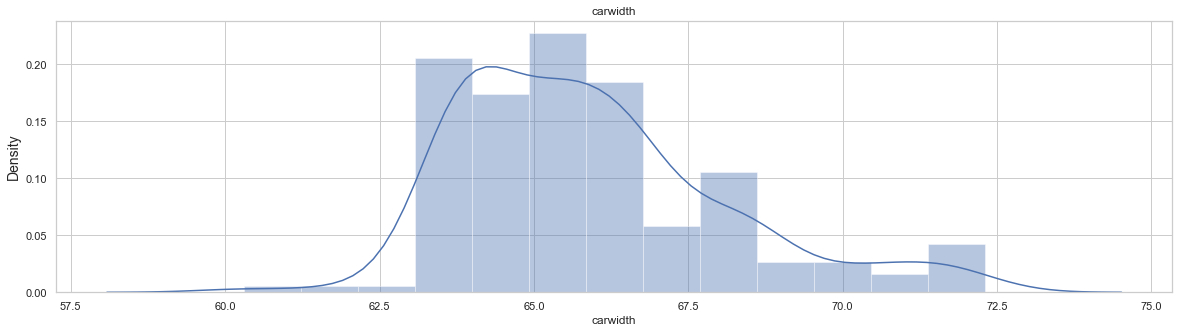

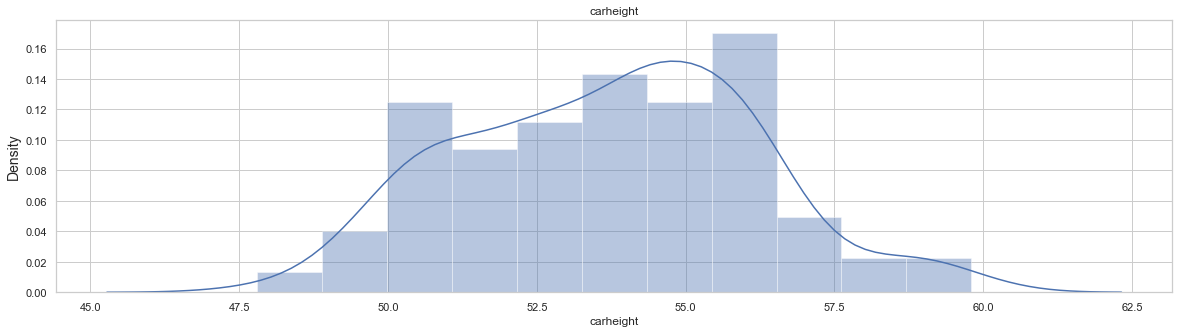

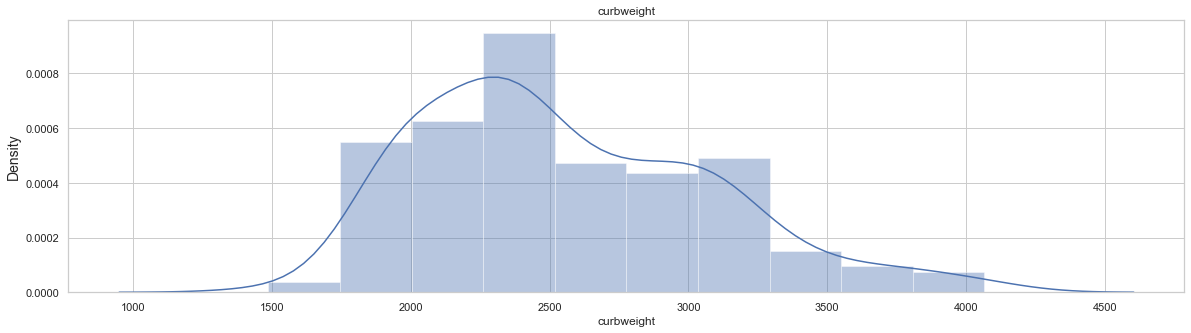

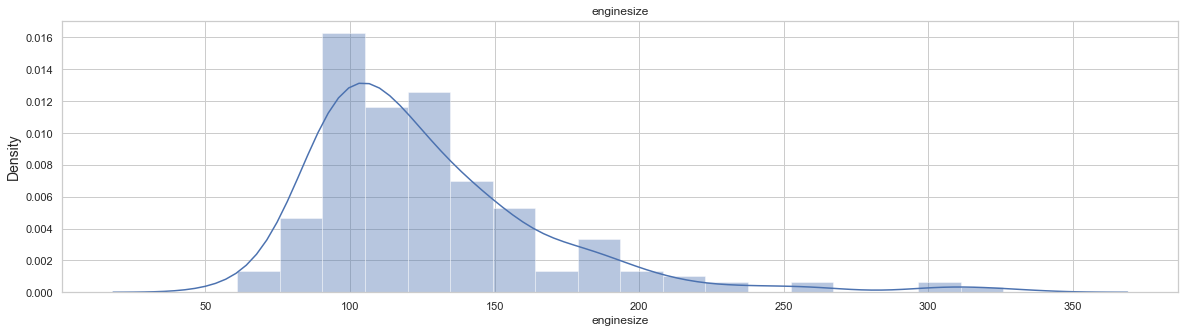

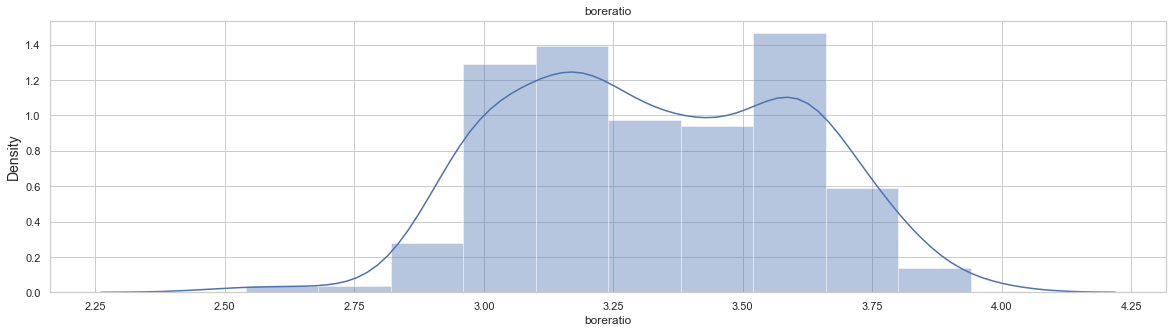

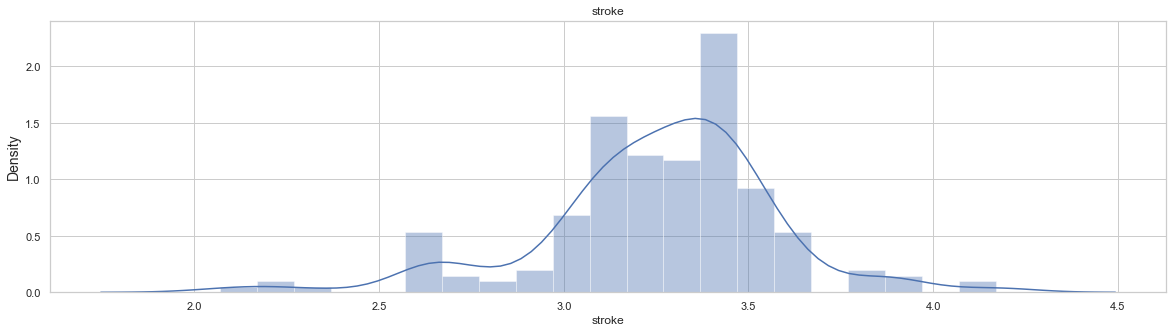

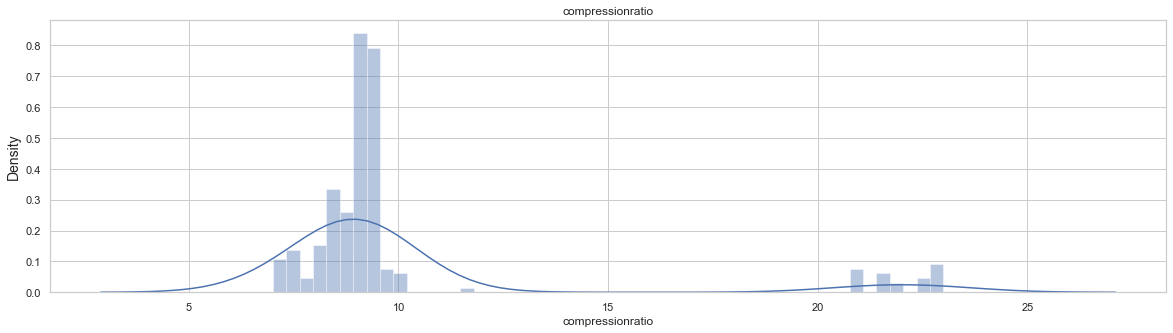

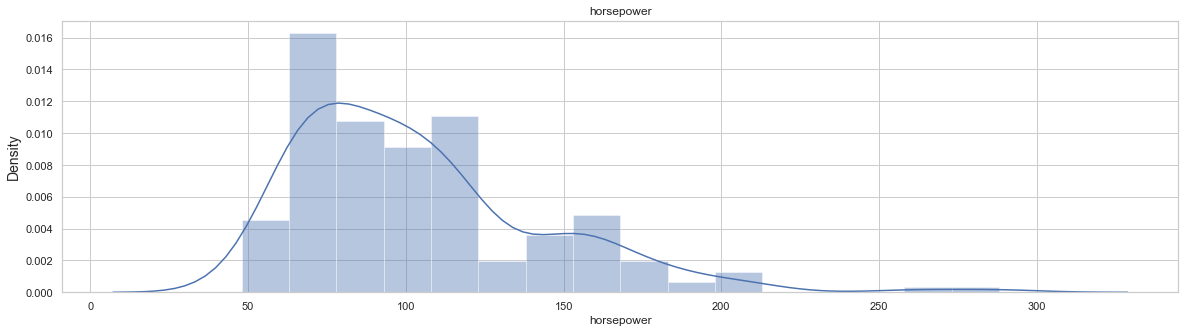

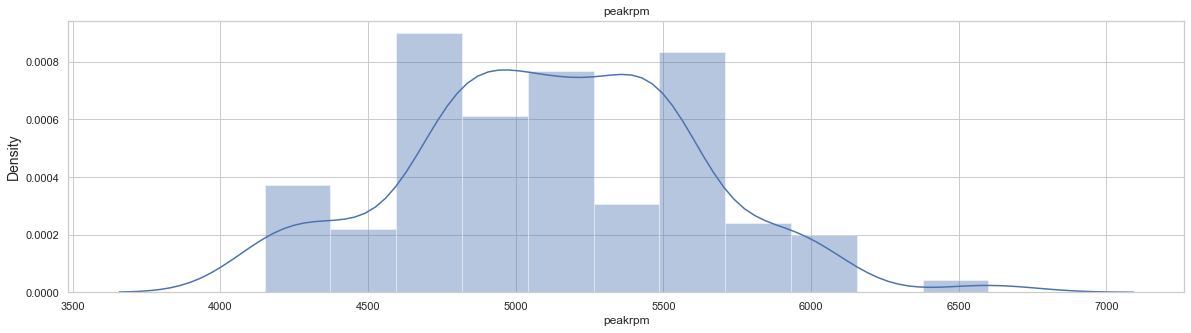

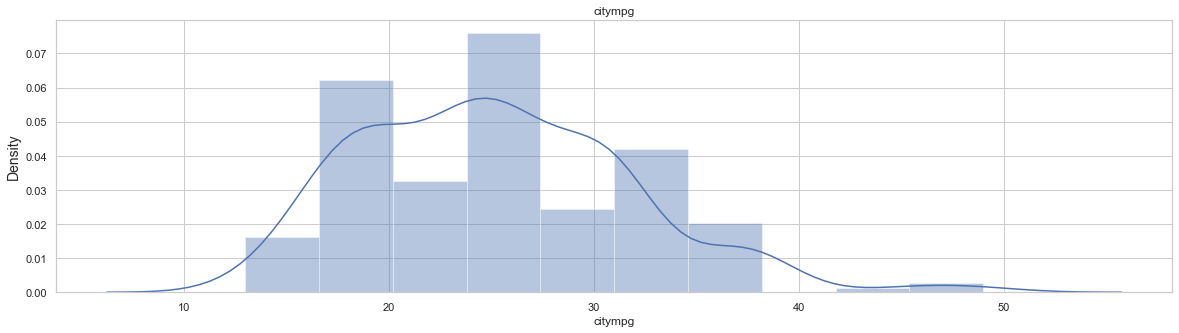

In [475]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(2, 20))
plotHistogram(df_num, 'wheelbase')
plotHistogram(df_num, 'carlength')
plotHistogram(df_num, 'carwidth')
plotHistogram(df_num, 'carheight')
plotHistogram(df_num, 'curbweight')
plotHistogram(df_num, 'enginesize')
plotHistogram(df_num, 'boreratio')
plotHistogram(df_num, 'stroke')
plotHistogram(df_num, 'compressionratio')
plotHistogram(df_num, 'horsepower')
plotHistogram(df_num, 'peakrpm')
plotHistogram(df_num, 'citympg')
plt.show()


Here, we notice that most of the numerical variables follow a normal distribution with minimum skew.

The variables that does not follow a normal distribution:
- compression ratio

### Analysis of categorical variables
Let us now analyze the categorical variables

In [476]:
# Defining a function to view the distribution of the categorical variables
def plotFrequencyTable(df, catColName):
    '''
    This function is used to plot the frequency table of the specified categorical variable
    @df (dataframe) - Dataframe for which frequency table is to be plotted
    @catColName (string) - Column name for which frequency table is to be plotted
    '''
    sns.countplot(x=catColName, data=df)
    plt.title(catColName)
    plt.xticks(rotation = 90)
    plt.show();

In [477]:
## Subsetting data to subset categorical variables
df_cat = df.select_dtypes(include='object')

In [478]:
# Viewing the head of the data for a sense-check
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### Frequency Tables of categorical variables to understand trend

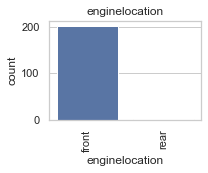

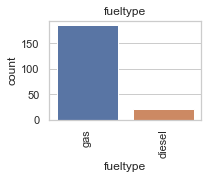

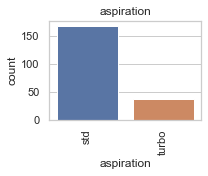

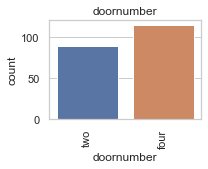

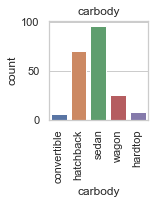

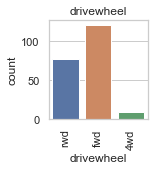

In [479]:
# Making boxplots as sub-plots to understand the trend of the data 

# plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plotFrequencyTable(df,'enginelocation')
plt.subplot(2,2,2)
plotFrequencyTable(df_cat,'fueltype')
plt.subplot(2,2,3)
plotFrequencyTable(df_cat,'aspiration')
plt.subplot(2,2,4)
plotFrequencyTable(df_cat,'doornumber')
plt.subplot(2,3,5)
plotFrequencyTable(df_cat,'carbody')
plt.subplot(2,3,6)
plotFrequencyTable(df_cat,'drivewheel')
plt.show()

A couple of observations from the above graph would indicate the following:
- The engine is mostly located in the <b>front</b> of the car
- Most of the cars use <b>gas</b> as their fuel
- The aspiration employed by most vehicles is <b>std</b> (standard)
- Just over half the cars sold have <b>four</b> doors
- The most popular car body is <b>sedan</b>
- Most of the cars have a <b>fwd</b> drive wheel

## Bivariate Analysis

Now, we shall perform bi-variate analysis on the variables with respect to price (dependent variable) 

### Correlation Analysis

Let us now analyze from the perspective of correlation analysis as to what the most correlated variable are with the <b>price</b> (dependent variable)

Let us now proceed to plot the correlation matrix of the data:

In [480]:
# Plotting the correlation matrix of the data
cor = df_num.corr()

In [481]:
#Correlation with output variable
cor_target = abs(cor['price'])

In [482]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
round(relevant_features.sort_values(ascending = True), 2)

boreratio     0.55
wheelbase     0.58
carlength     0.68
citympg       0.69
highwaympg    0.70
carwidth      0.76
horsepower    0.81
curbweight    0.84
enginesize    0.87
price         1.00
Name: price, dtype: float64

#### Heatmap of numerical variables

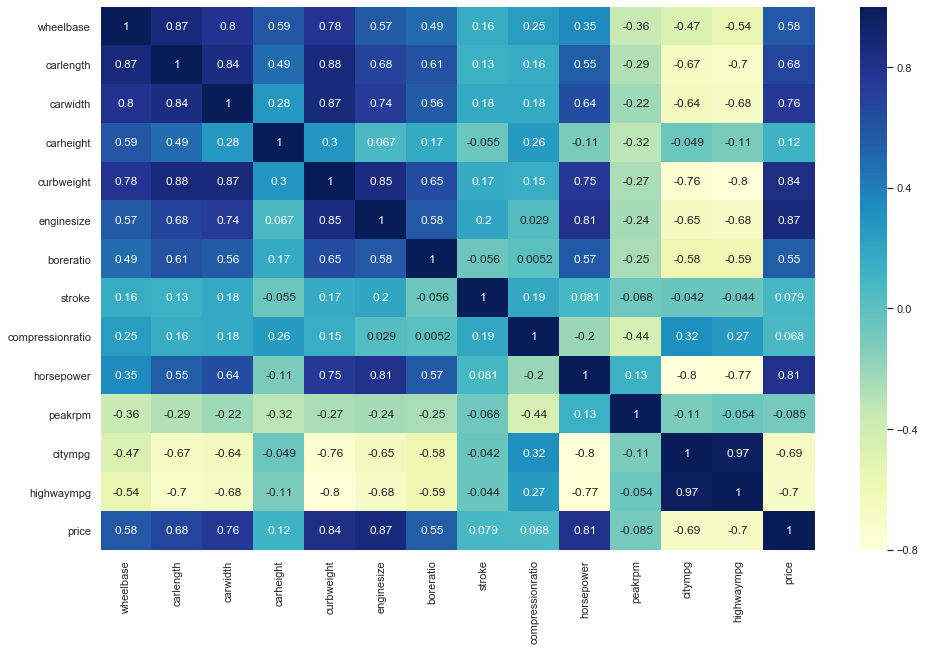

In [483]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Top 10 correlated features with price

Here, we notice that the top variables that are corrlated with price are as follows:
- enginesize    0.87
- curbweight    0.84
- horsepower    0.81
- carwidth      0.76
- highwaympg    0.70
- citympg       0.69
- carlength     0.68
- wheelbase     0.58
- boreratio     0.55


Pearson's correlation is considered significant when the variables generally have a correlation > 0.5.

Let us now try to do the business interpretation of the above variables as to why they may have a higher correlation as compared to the other variables:
- <b>engine size</b>: The more is the engine size of the car, the faster it can go. So, the materials used should be more strong and light which might lead to it being expensive
- <b>curb weight</b>: As curb weight increases, a more powerful engine would be required to pull the car, which would make the price go up
- <b>horse power</b>: A higher horse power adds to the cost of the car
- <b>car width</b>: This is an intersting find. This would imply cars that are wider in girth are an indication of a luxury car
- <b>highway mpg</b>: Interesting! A lower mileage seems to indicate a more expensive car
- <b>city mpg</b>: Interesting! A lower mileage seems to indicate a more expensive car
- <b>car length</b>: This is also interesting as it implies that the more the length of the car, higher is the price of the car
- <b>wheel base</b>: An equally interesting find, faster and more expensive cars seems to have a higher wheel base
- <b>bore ratio</b>: Higher the bore ratio implies that it is a faster car, which would in turn imply that the car is expensive

### Bivariate Plots

Now that we have found the variables that have the highest correlation with the dependent variable - price, we shall now plot the bivariate plots with price.

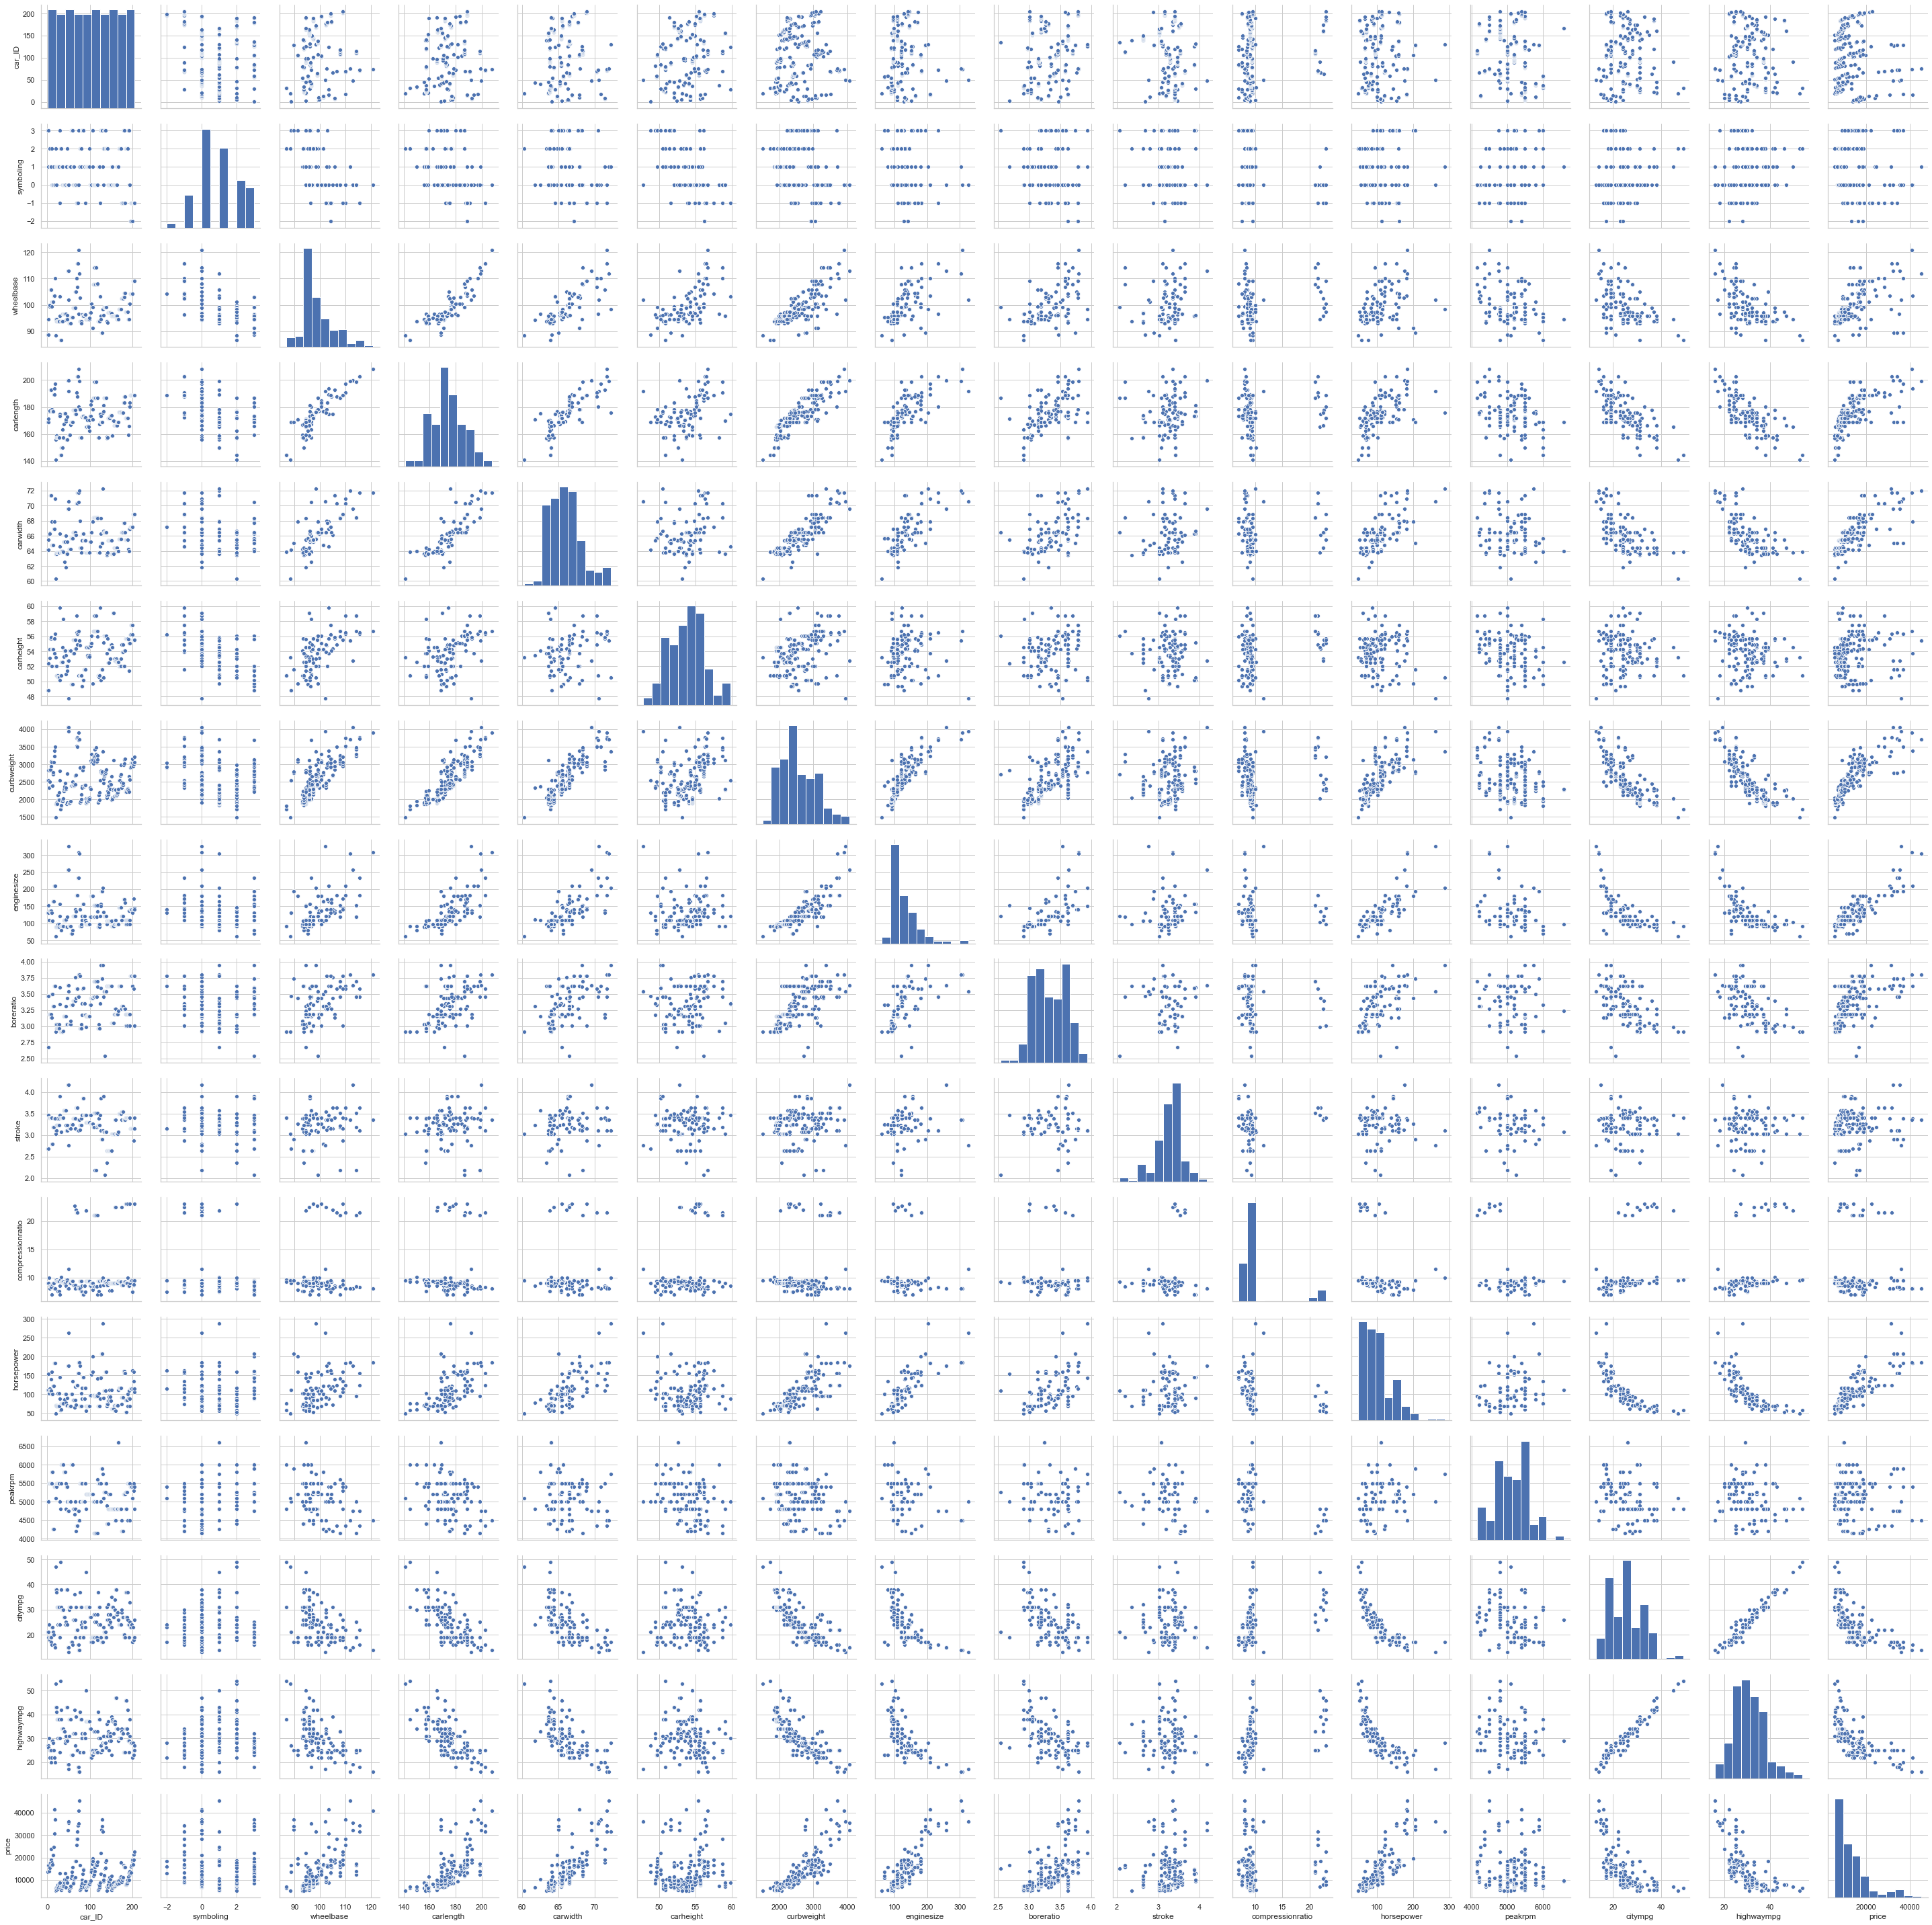

<Figure size 2880x2880 with 0 Axes>

In [484]:
# Plotting pair plots
sns.pairplot(df)
plt.figure(figsize=(40, 40))
plt.show()

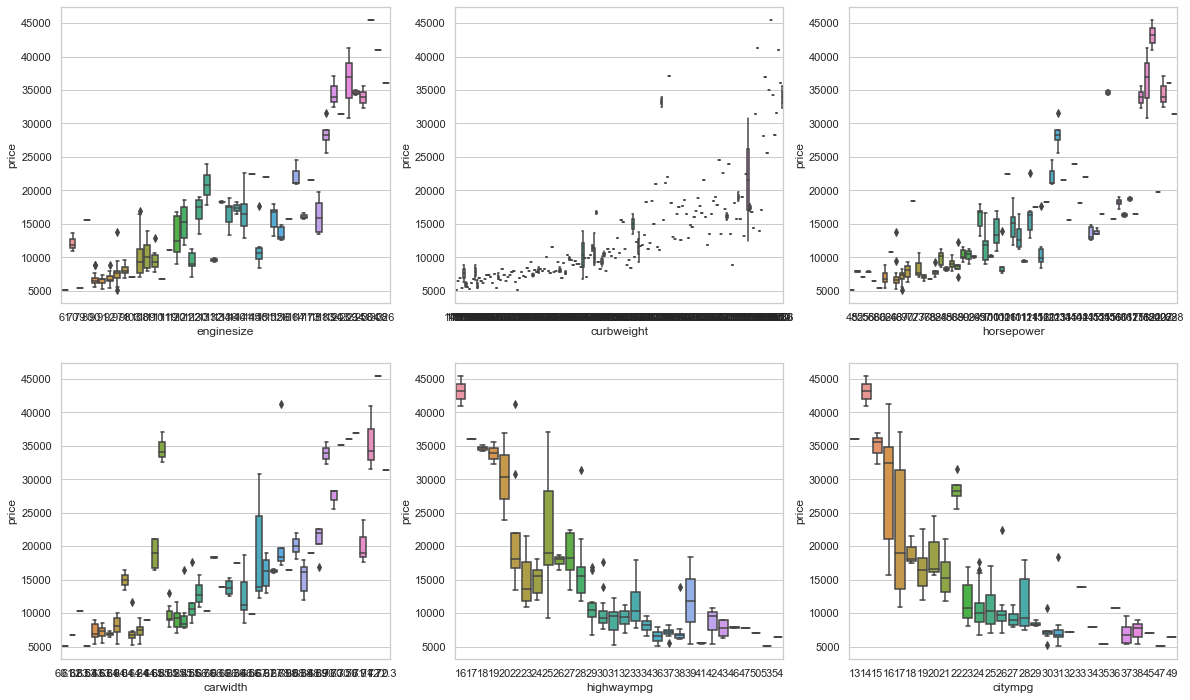

In [485]:
# Plotting the highly correlated variables with price to understand the trend
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginesize', y = 'price', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'curbweight', y = 'price', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'horsepower', y = 'price', data = df)

plt.subplot(2,3,4)
sns.boxplot(x = 'carwidth', y = 'price', data = df)

plt.subplot(2,3,5)
sns.boxplot(x = 'highwaympg', y = 'price', data = df)

plt.subplot(2,3,6)
sns.boxplot(x = 'citympg', y = 'price', data = df)
plt.show()

The bivariate distribution can be analyzed. The following trends are observed from the correlated variables: 
- As engine size increases, price increases
- As curb weight increases, price increases
- As horse power increases, price increases
- As the car width increases, price increases

The following trends are interesting:
- As the highway mileage increases, the price decreases
- As the city mileage increases, the price decreases

## Data Preprocessing:

- Get the name of the car company
- Correct the name of the car company


In [486]:
# Removing the unique identifier of the data
df.pop('car_ID').head()

0    1
1    2
2    3
3    4
4    5
Name: car_ID, dtype: int64

In [487]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [488]:
# Getting the name of the brand
df['CarName'] = df['CarName'].str.split('-').str[0]
df['CarName'] = df['CarName'].str.split(' ').str[0]

# Converting to lowercase
df['CarName'] = df['CarName'].str.lower()

# Correcting the mistakes present in the CarName columns like vw to volkswagen, maxda to mazda etc.
df['CarName'] = df['CarName'].str.replace('vw','volkswagen')
df['CarName'] = df['CarName'].str.replace('maxda','mazda')
df['CarName'] = df['CarName'].str.replace('vokswagen','volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta','toyota')

# Replacing occurences of 4wd with fwd as they are the same thing
df['drivewheel'] = df['drivewheel'].str.replace('4wd','fwd')

We shall now proceed to convert the categorical variables to dummy variables.

In [489]:
# # Making a function to make dummy variables
# def makeDummyVariables(df, colName):
#     '''
#     This function is used to make dummy variables, concatenate it to original dataframe and remove the older categorical column.
    
#     Inputs:
#     @colName (string): Name of the categorical column that we wish to make dummy variables for.
#     @df (dataframe): Dataframe which we would like to make modifications in
    
#     Output:
#     Desired dataframe with dummy varibles with original categorical variable (colName) removed
    
#     '''
#     # Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
#     status = pd.get_dummies(df[colName], drop_first = True)
    
#     # Concatenating the dummy variables to the dataframe
#     df = pd.concat([df, status], axis = 1)
    
#     # Dropping the original categorical variable from the dataframe
#     df.drop([colName], axis = 1, inplace = True)


# ---------------- function did not work for some reason. However, an attempt was made------------------------------

In [490]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['CarName'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['CarName'], axis = 1, inplace = True)

In [491]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['fueltype'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['fueltype'], axis = 1, inplace = True)

In [492]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['aspiration'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['aspiration'], axis = 1, inplace = True)

In [493]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['symboling'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['symboling'], axis = 1, inplace = True)

In [494]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['doornumber'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['doornumber'], axis = 1, inplace = True)

In [495]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['carbody'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['carbody'], axis = 1, inplace = True)

In [496]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['drivewheel'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['drivewheel'], axis = 1, inplace = True)

In [497]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['enginelocation'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['enginelocation'], axis = 1, inplace = True)

In [498]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['enginetype'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['enginetype'], axis = 1, inplace = True)

In [499]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['cylindernumber'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['cylindernumber'], axis = 1, inplace = True)

In [500]:
# Making dummy variables and dropping the first dummy column as n values should have n-1 dummy columns
status = pd.get_dummies(df['fuelsystem'], drop_first = True)

# Concatenating the dummy variables to the dataframe
df = pd.concat([df, status], axis = 1)

# Dropping the original categorical variable from the dataframe
df.drop(['fuelsystem'], axis = 1, inplace = True)

In [501]:
# Sense check of the data
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,-1,0,1,2,3,two,hardtop,hatchback,sedan,wagon,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [502]:
# Shape of the data
df.shape

(205, 69)

## Splitting the Data into Training and Testing Sets

In [503]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling. This is done for the numerical variables

In [504]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [505]:
# Obtaining the numerical features and scaling them
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
            'highwaympg']

# Scaling the numerical features
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Sense check of the data
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,volkswagen,volvo,gas,turbo,-1,0,1,2,3,two,hardtop,hatchback,sedan,wagon,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,7609.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,22018.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,9538.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,18950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [506]:
# Putting the dependent variable in 'y' 
y_train = df_train.pop('price')

# Putting the rest of the features in 'X'
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive Feature Elimination)

### RFE
Recursive feature elimination

In [507]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [508]:
# Running RFE with the output number of the variable equal to 20

# Making a linear regression model object
lm = LinearRegression()

# Fitting the model on the training dataset
lm.fit(X_train, y_train)

# Outputting the top 20 features
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [509]:
# listing the relevant features (obtained via Recursive Feature Elimination - RFE)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 15),
 ('audi', False, 25),
 ('bmw', True, 1),
 ('buick', False, 33),
 ('chevrolet', False, 12),
 ('dodge', False, 7),
 ('honda', False, 10),
 ('isuzu', False, 34),
 ('jaguar', False, 16),
 ('mazda', False, 29),
 ('mercury', False, 46),
 ('mitsubishi', True, 1),
 ('nissan', False, 31),
 ('peugeot', True, 1),
 ('plymouth', False, 6),
 ('porcshce', False, 47),
 ('porsche', True, 1),
 ('renault', False, 42),
 ('saab', False, 4),
 ('subaru', False, 40),
 ('toyota', False, 32),
 ('volkswagen', False, 30),
 ('volvo', False, 8),
 ('gas', False, 13),
 ('turbo', False, 2),
 (-1, False, 26),
 (0, False, 36),
 (1, False, 38),
 (2, False, 37),
 (3, False, 39),
 ('two', Fal

#### The features that say `True` are the ones that RFE believes will be relevant to predict the price.

#### The features that say `False` can be given priority, with 1 being the highest, although RFE has implies that the features will not be as relevant for the model

In [510]:
# The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'porsche',
       'rear', 'dohcv', 'l', 'rotor', 'five', 'four', 'three', 'twelve',
       'two'],
      dtype='object')

In [511]:
# The columns that were not selected by RFE
X_train.columns[~rfe.support_]

Index([       'wheelbase',        'carlength',        'carheight',
       'compressionratio',          'citympg',       'highwaympg',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'mazda',          'mercury',
                 'nissan',         'plymouth',         'porcshce',
                'renault',             'saab',           'subaru',
                 'toyota',       'volkswagen',            'volvo',
                    'gas',            'turbo',                 -1,
                        0,                  1,                  2,
                        3,              'two',          'hardtop',
              'hatchback',            'sedan',            'wagon',
                    'rwd',              'ohc',             'ohcf',
                   'ohcv',              'six',             '2bbl',
                   '4bbl',              'idi',              'm

### Building model using statsmodel, for the detailed statistics

In [512]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model Iteration 1

In [513]:
# Adding a constant variable as stats models does not have a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [514]:
# Running the linear model to understand the ordinary least squares
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [515]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.02e-68
Time:                        07:51:34   Log-Likelihood:                -1276.4
No. Observations:                 143   AIC:                             2593.
Df Residuals:                     123   BIC:                             2652.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6989.3965   1496.406     -4.671      0.0

## Model Iteration 2

In [516]:
X_train_rfe = X_train_rfe.drop(["two"], axis = 1)

Rebuilding the model without `two`

In [517]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [518]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [519]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.74e-69
Time:                        07:51:34   Log-Likelihood:                -1276.4
No. Observations:                 143   AIC:                             2591.
Df Residuals:                     124   BIC:                             2647.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6954.6540   1484.479     -4.685      0.0

## Model Iteration 3

In [520]:
X_train_rfe = X_train_rfe.drop(["dohcv"], axis = 1)

Rebuilding the model without `dohcv`

In [521]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.29e-70
Time:                        07:51:34   Log-Likelihood:                -1276.4
No. Observations:                 143   AIC:                             2589.
Df Residuals:                     125   BIC:                             2642.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6939.2532   1473.445     -4.710      0.0

## Model Iteration 4

In [522]:
X_train_rfe = X_train_rfe.drop(["peakrpm"], axis = 1)

Rebuilding the model without `peakrpm`

In [523]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.41e-71
Time:                        07:51:35   Log-Likelihood:                -1276.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     126   BIC:                             2638.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6522.3167   1408.348     -4.631      0.0

## Model Iteration 5

In [524]:
X_train_rfe = X_train_rfe.drop(["horsepower"], axis = 1)

Rebuilding the model without `horsepower`

In [525]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.89e-71
Time:                        07:51:35   Log-Likelihood:                -1279.9
No. Observations:                 143   AIC:                             2592.
Df Residuals:                     127   BIC:                             2639.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5466.7956   1354.358     -4.036      0.0

In [526]:
X_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'bmw', 'mitsubishi', 'peugeot', 'porsche', 'rear', 'l', 'rotor', 'five',
       'four', 'three', 'twelve'],
      dtype='object')

## VIF - Variance Inflation Factor

In [542]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

KeyError: "['const'] not found in axis"

In [543]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,peugeot,inf
10,l,inf
14,three,inf
2,enginesize,80.74
1,curbweight,54.10
0,carwidth,41.25
3,boreratio,34.57
4,stroke,31.43
13,four,24.19
11,rotor,3.96


In [544]:
# Making a copy of the application in dataframe df (checkpoint!) 
X_train_new = X_train_rfe.copy(deep=False)

In [545]:
X_train_new = X_train_new.drop(["three"], axis = 1)

In [546]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,80.74
1,curbweight,54.10
0,carwidth,41.25
3,boreratio,34.57
4,stroke,31.43
13,four,24.19
7,peugeot,11.49
10,l,11.13
11,rotor,3.96
14,twelve,2.81


In [547]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.89e-71
Time:                        07:54:58   Log-Likelihood:                -1279.9
No. Observations:                 143   AIC:                             2592.
Df Residuals:                     127   BIC:                             2639.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5466.7956   1354.358     -4.036      0.0

In [557]:
# Viewing the final columns to be used in the model
X_train_new.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'mitsubishi', 'peugeot', 'porsche', 'rear', 'l', 'rotor', 'five',
       'four', 'twelve'],
      dtype='object')

We notice that if we remove more columns, the R-Squared gradually reduces.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [548]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

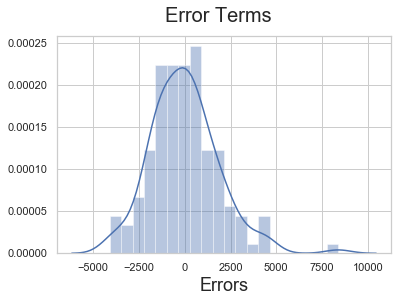

In [549]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We note that the errors are normally distributed

## Making Predictions

#### Applying the scaling on the test sets

In [550]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
            'highwaympg']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [551]:
y_test = df_test.pop('price')
X_test = df_test

In [552]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [553]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

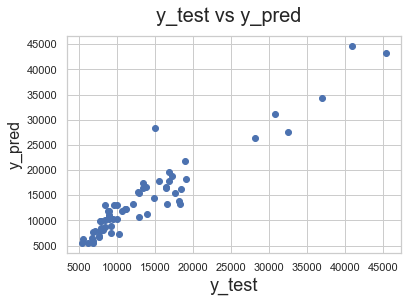

In [554]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [555]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm = sm.add_constant(X_test_new)

# Running the linear model
lm = sm.OLS(y_test,X_test_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     51.72
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.36e-23
Time:                        07:56:33   Log-Likelihood:                -566.91
No. Observations:                  62   AIC:                             1160.
Df Residuals:                      49   BIC:                             1187.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3302.1683   3105.127     -1.063      0.2

## R-Squared value

In [556]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8883749591412645

Hence, the features that can be mentioned as good predictors to model the price are: **Geely Auto** can use are:
- carwidth
- curbweight
- enginesize
- boreratio
- stroke
- bmw
- mitsubishi
- peugeot
- porsche
- rear
- l
- rotor
- five
- four
- twelve

A couple of interesting points to note about a care that would have a higher price:
   - An "I - Engine type" is an indicator of the car being more expensive
   - BMW, Peugeot and Porsche are the more expensive brands
   - Heavier car and wider cars are more expensive
   - Higher numer of cylinders is a string indicator of a more expensive car (>4)